## Simulation of Circuit on Yorktown and Belem

- The goal is to make a CNOT gate between qubit 2 and 4 on a 5 qubit circuit
- This circuit is then implemented on IBM - yorktown and IBM - Belem to verify that **does topology play a major role in defining errors?** 

In [92]:
from qiskit import * 
from qiskit.tools.visualization import plot_histogram 
import qiskit.tools.jupyter
from qiskit.providers.aer.noise import NoiseModel 
%matplotlib inline 
import matplotlib.pyplot as plt 
provider = IBMQ.load_account()

E:\ANACONDA\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-04-20 22:37:04,732: Credentials are already in use. The existing account in the session will be replaced.


In [51]:
%qiskit_backend_overview

### Getting the backend configurations
- Use `get_backend()` method to get the configs of the backend you are trying to simulate

In [56]:
york_town = provider.get_backend('ibmq_5_yorktown')

In [65]:
belem = provider.get_backend('ibmq_belem')

- Use these actual devices to make a simulator just like those original devices

In [77]:
noise_york = NoiseModel.from_backend(backend= york_town)
noise_belem = NoiseModel.from_backend(backend=belem)

## Making the circuit for testing

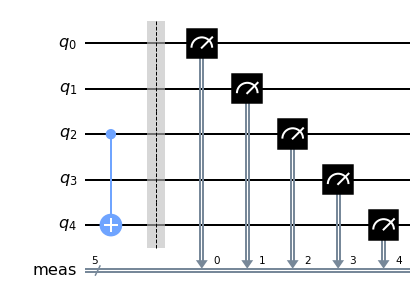

In [74]:
qc = QuantumCircuit(5)
qc.cx(2,4)
qc.measure_all()
display(qc.draw('mpl'))

In [89]:
def get_qc(i,draw = False):
    qc = QuantumCircuit(5,name = 'circ'+str(i))
    qc.cx(2,4)
    qc.measure_all()
    if draw:
        display(qc.draw('mpl'))
    return qc 

- This circuit is not simulated on both of the devices and a graph is plotted against the number of shots

### Simulating original devices on QASM

In [102]:
shots = [256*i for i in range(1,15)]
probs_yorktown = []
probs_belem = []
backend = Aer.get_backend('qasm_simulator')
for s in shots:
    # get 2 quantum circuits
    q1,q2 = get_qc(i=s//256,draw=False),get_qc(i=s//256 + 1,draw=False)
    print("Executing for",s,"shots...")
    # simulate on the yorktown 
    job1 = execute(q1, backend= backend,noise_model = noise_york,shots = s)
    res1 = job1.result()
    c1 = res1.get_counts()['00000'] # should not be any affect as all are 0
    probs_yorktown.append(c1/s)
    
    # simulate on the belem 
    job2 = execute(q2,backend= backend,noise_model = noise_belem,shots = s)
    res2 = job2.result()
    c2 = res2.get_counts()['00000'] # should not be any affect as all are 0
    probs_belem.append(c2/s)
    

print("Probabilities of |00000> on yorktown : ",probs_yorktown,"\n")
print("Probabilities of |00000> on belem : ",probs_belem)

    

Executing for 256 shots...
Executing for 512 shots...
Executing for 768 shots...
Executing for 1024 shots...
Executing for 1280 shots...
Executing for 1536 shots...
Executing for 1792 shots...
Executing for 2048 shots...
Executing for 2304 shots...
Executing for 2560 shots...
Executing for 2816 shots...
Executing for 3072 shots...
Executing for 3328 shots...
Executing for 3584 shots...
Probabilities of |00000> on yorktown :  [0.75390625, 0.818359375, 0.78515625, 0.80859375, 0.79453125, 0.787109375, 0.7991071428571429, 0.775390625, 0.7829861111111112, 0.786328125, 0.7883522727272727, 0.7858072916666666, 0.7923677884615384, 0.8013392857142857] 

Probabilities of |00000> on belem :  [0.93359375, 0.935546875, 0.9361979166666666, 0.94140625, 0.940625, 0.9368489583333334, 0.9397321428571429, 0.92578125, 0.93359375, 0.931640625, 0.9300426136363636, 0.9348958333333334, 0.9308894230769231, 0.9347098214285714]


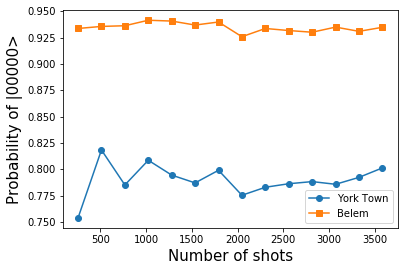

In [103]:
plt.plot(shots,probs_yorktown,marker='o',label = "York Town")
plt.plot(shots,probs_belem,marker='s',label = "Belem")
plt.xlabel("Number of shots",fontsize = 15)
plt.ylabel("Probability of |00000>",fontsize = 15)
plt.legend()
plt.show()

- Since the **ibmq_belem** has a CNOT error of ~ 0.0098 which is lesser than the 0.0183 CNOT error of the **ibmq_yorktown**, thus **ibmq_belem** has a better probability of detecting the correct |00000> state with HIGHER PROBABILITY.

### Testing for actual flip too
- The bit is now made 1 so that CX is actually executed! 
- Let's see errors now


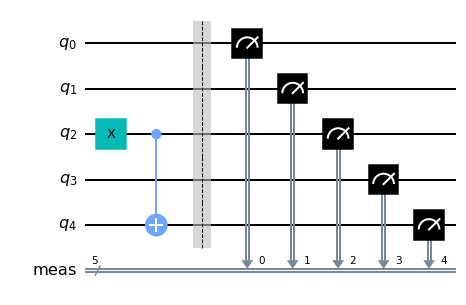

In [105]:
qc = QuantumCircuit(5)
qc.x(2)
qc.cx(2,4)
qc.measure_all()
display(qc.draw('mpl'))

In [108]:
def get_qc2(i):
    qc = QuantumCircuit(5,name = 'circ'+str(i))
    qc.x(2)
    qc.cx(2,4)
    qc.measure_all()
    return qc 

### Simulating the circuit
- Note : the target state is going to be '10100' as the most significant bit is flipped

In [109]:
shots = [256*i for i in range(1,15)]
probs_yorktown = []
probs_belem = []
backend = Aer.get_backend('qasm_simulator')
for s in shots:
    # get 2 quantum circuits
    q1,q2 = get_qc2(i=s//256),get_qc2(i=s//256 + 1)
    print("Executing for",s,"shots...")
    # simulate on the yorktown 
    job1 = execute(q1, backend= backend,noise_model = noise_york,shots = s)
    res1 = job1.result()
    c1 = res1.get_counts()['10100'] # should not be any affect as all are 0
    probs_yorktown.append(c1/s)
    
    # simulate on the belem 
    job2 = execute(q2,backend= backend,noise_model = noise_belem,shots = s)
    res2 = job2.result()
    c2 = res2.get_counts()['10100'] # should not be any affect as all are 0
    probs_belem.append(c2/s)
    

print("Probabilities of |10100> on yorktown : ",probs_yorktown,"\n")
print("Probabilities of |10100> on belem : ",probs_belem)

    

Executing for 256 shots...
Executing for 512 shots...
Executing for 768 shots...
Executing for 1024 shots...
Executing for 1280 shots...
Executing for 1536 shots...
Executing for 1792 shots...
Executing for 2048 shots...
Executing for 2304 shots...
Executing for 2560 shots...
Executing for 2816 shots...
Executing for 3072 shots...
Executing for 3328 shots...
Executing for 3584 shots...
Probabilities of |10100> on yorktown :  [0.71484375, 0.697265625, 0.7213541666666666, 0.72265625, 0.715625, 0.7115885416666666, 0.6897321428571429, 0.71044921875, 0.7174479166666666, 0.725390625, 0.7027698863636364, 0.712890625, 0.7154447115384616, 0.728515625] 

Probabilities of |10100> on belem :  [0.8515625, 0.84375, 0.88671875, 0.888671875, 0.865625, 0.87890625, 0.8655133928571429, 0.8779296875, 0.8715277777777778, 0.868359375, 0.8678977272727273, 0.8727213541666666, 0.8728966346153846, 0.8747209821428571]


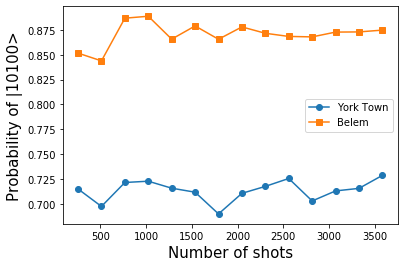

In [110]:
plt.plot(shots,probs_yorktown,marker='o',label = "York Town")
plt.plot(shots,probs_belem,marker='s',label = "Belem")
plt.xlabel("Number of shots",fontsize = 15)
plt.ylabel("Probability of |10100>",fontsize = 15)
plt.legend()
plt.show()

- Again , BELEM shines over york town as it has **lower CNOT error rate**!